#### Master 1ère année
#### Initiation à la Cryptographie

# Chiffrements antiques 

In [1]:
import numpy as np
import string

### [César]

On considère le chiffrement par décalage de d positions des lettres de l'alphabet. Si
d = 3, le chiffrement est appelé Chiffre de César et ainsi la lettre A devient D, la lettre B devient E,
etc

In [2]:
def chiffrerCesar(clair,clé):
    chiffre=""
    for lettre in clair:
        val=ord(lettre)+clé
        chiffre+=chr(val)
    return chiffre

def decffirerCesar(chiffré,clé):
    clair=""
    for lettre in chiffré:
        val=ord(lettre)-clé
        clair+=chr(val)
    return clair


### 1 - Chiffrer le message suivant ****CESAR VAINCRA ***

In [3]:
msg="cesar vaincra"
d=3

"Le chiffré est : ",chiffrerCesar(msg,d)

('Le chiffré est : ', 'fhvdu#ydlqfud')

### 2 - Déchiffrer le message suivant  ***DOHDMDFWDHVW***

In [4]:
chiffré="DOHDMDFWDHVW"
" Le clair est : ",decffirerCesar(chiffré,d)

(' Le clair est : ', 'ALEAJACTAEST')

### On peut généraliser par une substitution quelconque : on fait correspondre l'alphabet ordonné avec un alphabet permuté. Combien y-a-t-il de possibilités?

R : 26!-1 possibilités , car on prend pas la permuntation à une lettre

### [Carré de Polybe] 

Le chiffrement est effectué à l'aide d'une matrice indexée par les entiers
de 1 à 5 dans laquelle on met les 26 lettres de l'alphabet (W supprimé ou I et J sont dans la même case).
Par exemple, on considère la matrice suivante :


|   | 0 | 1 | 2 | 3 | 4 |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 0 | A | B | C | D | E |
| 1 | F | G | H | I | J |
| 2 | K | L | M | N | O |
| 3 | P | Q | R | S | T |
| 4 | U | V | X | Y | Z |

In [5]:
def ajouterCléAuCarre(clé):
    carre=np.zeros((5,5))
    lig=0
    col=0
    for lettre in clé:
        if ord(lettre.upper()) not in carre:
            if col==5: # au bout d'une ligne 
                lig+=1
                col=0
                
            if lig==5:
                break
                
            carre[lig][col]=ord(lettre.upper())
            col+=1
    return carre,lig,col
    
def terminerLeCarre(carre,lig,col):
    col=col
    lig=lig
    alph=["a", "b", "c", "d","e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "x", "y" , "z"]
    for lettre in alph:
        if ord(lettre.upper()) not in carre:
            if col==5: # au bout d'une ligne 
                lig+=1
                col=0
                
            if lig==5:
                break
                
            carre[lig][col]=ord(lettre.upper())
            col+=1
    return carre


def findLettre(lettre,carre):
    res=""
    for lig in range(carre.shape[0]):
        find = False 
        for col in range(carre.shape[1]):
            if lettre==carre[lig][col]:
                res+=str(lig)+str(col)
                find=True
                break
        if find:
            break
    return res+"-"
            
            
            
def chifferPolybe(clair,carre):
    res=""
    for lettre in clair:
        res+=findLettre(ord(lettre.upper()),carre)
    return res


def dechiffrerPolybe(chiffre,carre):
    res=""
    for item in chiffre.split("-"):
        if item:
            lig=int(item[0])
            col=int(item[1])
            val=carre[lig][col]
            #print(int(val),"<<")
            res+=chr(int(carre[lig][col]))
    return res
    
        

In [6]:
carre,lig,col=ajouterCléAuCarre("abcde")
terminerLeCarre(carre,lig,col)
clair="CarreDEPolybe"
chiffré=chifferPolybe(clair,carre)
" Le chiffre est : ",chifferPolybe(clair,carre)

(' Le chiffre est : ', '02-00-32-32-04-03-04-30-24-21-43-01-04-')

In [7]:
" Le déchiffé est : ",dechiffrerPolybe(chiffré,carre)

(' Le déchiffé est : ', 'CARREDEPOLYBE')

### [Permutation] 

On considère le chiffrement par une écriture en dent de scie : on prend une
lettre sur deux du mot puis le reste

In [8]:
def chiffrementDentdeScie(clair,d):
    clair=list(clair)
    res=""
    for i in range(0,len(clair),d):
        res+=clair[i]
        
    for i in range(1,len(clair),2):
        res+=clair[i]
    return res

def dechiffrerDentdeScie(chiffré):
    res=[""]*len(chiffré)
    tailleTotal=len(chiffré)
    moitié2=int(tailleTotal/2)
    moitié1=tailleTotal-moitié2
    mot1 = chiffré[:moitié1]
    mot2 = chiffré[moitié2+1:]
    for i in range(0,moitié1):
        res[2*i]=mot1[i]
    for i in range(1,moitié2+1):
           res[2*i-1]=mot2[i-1]
        
    
    return res

### 1 - Chiffrer le message suivant ***MASTERLIMOGES***.

In [9]:
clair="masterlimoges"
chiffré=chiffrementDentdeScie(clair,2)
" Le chiffré est : ",chiffré

(' Le chiffré est : ', 'mselmgsatrioe')

In [10]:
" Le dechiffré est : ",dechiffrerDentdeScie(chiffré)

(' Le dechiffré est : ',
 ['m', 'a', 's', 't', 'e', 'r', 'l', 'i', 'm', 'o', 'g', 'e', 's'])

## [Vigenère, ≈ 1550]

Chaque lettre du message est déplacé dans l'alphabet selon un vecteur
décalage de longueur k, qui est utilisé comme clef (A=1). Ce vecteur est répété si nécessaire.

In [11]:
def decoupage(chaine,cle):
    chaine = list(chaine)
    decoupage=[]
    if len(cle) >1:
        while len(chaine)>0:
            lTemp=[]
            for i in range(len(cle)):
                if i <len(chaine):
                    lTemp.append(chaine[i])
            decoupage.append(lTemp)        
            for i in range(len(cle)):
                if len(chaine)>0:
                    del chaine[0]
    return decoupage

def chiffrer(chaine,cle):
    cypherText=""
    alph=list(string.ascii_uppercase)
    decoup = decoupage(chaine,cle)
    for bout in decoup:
        morceau=""
        for i in range(len(bout)):
            indexMot=alph.index(bout[i].upper())
            indexCle=alph.index(cle[i].upper())
            pos= indexMot+indexCle
            pos=pos%26
            morceau+=alph[pos]
        cypherText+=morceau
    return cypherText
    
def dechiffrer(chaine,cle):
    plainText=""
    alph=list(string.ascii_uppercase)
    decoup= decoupage(chaine,cle)
    for bout in decoup:
        morceau=""
        for i in range(len(bout)):
            indexMot=alph.index(bout[i].upper())
            indexCle=alph.index(cle[i].upper())
            pos= indexMot-indexCle
            pos=pos%26
            morceau+=alph[pos]
        plainText+=morceau
    return plainText

In [12]:
clé="master"
clair="vigenere"
chiffré = chiffrer(clair,clé)
" Le chiffré est : ",chiffré

(' Le chiffré est : ', 'HIYXRVDE')

In [13]:
dechiffré = dechiffrer(chiffré,clé)
" Le déchiffré est : ", dechiffré

(' Le déchiffré est : ', 'VIGENERE')

### [Playfair, 1854]

Le chiffre de Playfair utilise un tableau de 5x5 lettres, contenant un mot
clé ou une phrase. La mémorisation du mot clé et de 4 règles faciles à suivre suffisait pour utiliser ce
chiffrement.

Pour construire le tableau, on devait d'abord le remplir avec les lettres du mot clé (en ignorant les
doublons), puis le compléter avec les autres lettres de l'alphabet dans l'ordre (soit en omettant la lettre
W peu courante, soit en occupant une même case pour les lettres I et J suivant les versions). Le mot clé
peut être écrit en ligne, en colonne ou même en spirale (on choisira la version ligne).
Pour chiffrer un message, il faut prendre les lettres 2 par 2 et appliquer les règles suivantes en fonction
de la position des lettres dans la table :

 -  si les 2 lettres sont identiques (ou s'il n'en reste qu'une) mettre un 'X' après la première lettre. Chiffrer la nouvelle paire ainsi constituée et continuer avec la suivante.

 - si les lettres se trouvent sur la même ligne de la table, il faut les remplacer par celles se trouvant immédiatement à leur droite (en bouclant sur la gauche si le bord est atteint),

- si les lettres apparaissent sur la même colonne, les remplacer par celles qui sont juste en dessous(en bouclant par le haut si le bas de la table est atteint),

- sinon, remplacer les lettres par celles se trouvant sur la même ligne, mais dans le coin opposé du rectangle défini par la paire originale.

In [14]:
carre,lig,col=ajouterCléAuCarre("PLAYFAIR")
clé = terminerLeCarre(carre,lig,col)
clé

array([[80., 76., 65., 89., 70.],
       [73., 82., 66., 67., 68.],
       [69., 71., 72., 74., 75.],
       [77., 78., 79., 81., 83.],
       [84., 85., 86., 88., 90.]])

In [15]:
def chiffrerPlayFair(clair,carre):
    print(" à terminer hahahaha")
    

### [ADFGVX, 1918] 

La première partie est le codage du message dans un alphabet réduit constitué des lettres A, D, F, G, V, X. La disposition des éléments sur la grille est partie intégrante de la clef (transmise au correspondant).



|   | A | D | F | G | V | X |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| A | 8 | p | 3 | d | 1 | n |
| D | 1 | t | 4 | o | a | h |
| F | 7 | k | b | c | 5 | z |
| G | j | u | 6 | w | g | m |
| V | x | s | v | i | r | 2 |
| X | 9 | e | y | 0 | f | q |




Ainsi le 8 sera remplacé par AA et p par AD.

message : attaques à 10 h 05
Texte clair : a t t a q u e s à 1 0 h 0 5
Texte chiffré (1ère étape) : DV DD DD DV XX GD XD VD DV AV XG DX XG FV

La deuxième partie dépend d'un mot-clef, qui ici sera MARC par exemple, et qui doit être connu des deux correspondants. D'abord, les lettres du mot-clef sont écrites sur la première ligne d'une nouvelle grille. 

Ensuite, on porte le texte chiffré de la première étape sur une série de lignes, comme ci-dessous.


Les colonnes de la grille sont ensuite remplacées de telle sorte que les lettres du mot-clé soient dans l'ordre alphabétique. Le texte chiffré fi nal est obtenu en descendant chaque colonne l'une après l'autre et en écrivant les lettres selon ce nouvel ordre. On lit donc le chiffré de haut en bas (puis gauche à droite).





| M | A | R | C |
|:-:|:-:|:-:|:-:|
| D | V | D | D |
| D | D | D | V |
| X | X | G | D |
| X | D | V | D |
| D | V | A | V |
| X | G | D | X |
| X | G | F | V |



Déplaçons les colonnes pour mettre les lettres du mot-clef dans l'ordre alphabétique

| A | C | M | R |
|:-:|:-:|:-:|:-:|
| V | D | D | D |
| D | V | D | D |
| X | D | X | G |
| D | D | X | V |
| V | V | D | A |
| G | X | X | D |
| G | V | X | F |



Texte chiffré final VDXDVGGDVDDVXVDDXXDXXDDGVADF



Le texte chiffré final pourra être transmis en morse, et le destinataire inversera le procédé de chiffrement pour retrouver le texte originel. Le texte chiffré n'est fait qu'avec six lettres ADFGVX, qui qualifient les lignes et les colonnes de la première grille. On demande souvent pourquoi ces lettres ont été choisies plutôt que, disons, les lettres de A à F. 

La raison est que les lettres A,D,F,G,V et X ne se ressemblent pas lorsqu'on les traduit dans le système points et traits du Morse, ce qui minimise les risques 'erreurs
dans les transmissions


In [17]:
def chifferADFGVX(clair):
    print(" à faire ")
    
def dechifferADFGVX(chiffré):
    print(" à faire ")

- 1 Chiffrer  ChiffrementADFGVX avec cette méthode avec la clef  ***RAPIDE***

- 2 Déchiffrer  AGDXDGXXVXDDVAXXDDVXVGFDXGVGDX  sachant que le mot-clef est ***MASTER***

### [ENIGMA]

On considère un rotor Enigma simplifié à 6 paires de connections.

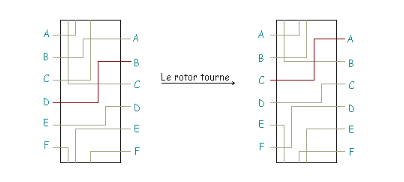

Les positions gauche et droite sont reliées de la façon suivante : (1-3, 2-2, 3-4, 4-1, 5-6, 6-5).

In [20]:
def chiffrerEnigma(clair):
    print("à faire")
    
def dechiffrerEnigma(chifrré):
    print(" à faire ")

- 1 Chiffrer le message suivant : CDBAFFE, le rotor étant dans la position initiale décrite précédemment.

### [Code ASCII]


 - Déterminer le développement binaire et le développement hexadécimal du nombre décimal 215.

In [32]:
" le binaire ",bin(215), " l'hexa " ,hex(215)

(' le binaire ', '0b11010111', " l'hexa ", '0xd7')

- Déterminer l'écriture ASCII de 'SECRET' sachant que 'A' est codé par 41 en hexadécimal

In [29]:
" SECRET donne ", hex(ord("S")),hex(ord("E")),hex(ord("C")),hex(ord("R")),hex(ord("E")),hex(ord("T"))

(' SECRET donne ', '0x53', '0x45', '0x43', '0x52', '0x45', '0x54')

- Déterminer le chiffrement par XOR du message précédent avec la clé précédente (215)

In [42]:
print('{0:b}'.format(int(bin(215)[2:],2) ^ int(bin( int( hex(ord("S"))[2:] ) ) ,2)))
print('{0:b}'.format(int(bin(215)[2:],2) ^ int(bin( int( hex(ord("E"))[2:] ) ) ,2)))
print('{0:b}'.format(int(bin(215)[2:],2) ^ int(bin( int( hex(ord("C"))[2:] ) ) ,2)))
print('{0:b}'.format(int(bin(215)[2:],2) ^ int(bin( int( hex(ord("R"))[2:] ) ) ,2)))
print('{0:b}'.format(int(bin(215)[2:],2) ^ int(bin( int( hex(ord("E"))[2:] ) ) ,2)))
print('{0:b}'.format(int(bin(215)[2:],2) ^ int(bin( int( hex(ord("T"))[2:] ) ) ,2)))

11100010
11111010
11111100
11100011
11111010
11100001
